Apple Stock

Introduction:
We are going to use Apple's stock price.

Step 1. Import the necessary libraries

In [4]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address

In [5]:
ap = pd.read_csv("apple_data.csv")

Step 3. Assign it to a variable apple

In [6]:
apple = pd.DataFrame(ap)

Step 4. Check out the type of the columns

In [ ]:
#type(apple)  //This is irrelevant but it is used to find the type of data series or dataframe
apple.dtypes

Step 5. Transform the Date column as a datetime type

In [ ]:
apple['Date']=pd.to_datetime(apple['Date'])
print(apple['Date'].dtype)

Step 6. Set the date as the index

In [ ]:
apple.head()

In [ ]:
apple.info

In [17]:
## drop the 'Date' column
#apple = apple.drop('Date', axis=1)

# set the index to be the 'Date' column
apple = apple.set_index('Date')


In [ ]:
apple.head()

Step 7. Is there any duplicate dates?

In [16]:

apple['Date'].duplicated().any()


False

In [ ]:
apple.shape

In [ ]:
apple.drop_duplicates('Date',inplace=True)

In [ ]:
apple.shape
#no duplicates then

Step 8. Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [19]:
apple = apple.sort_values('Date', ascending=True)


In [ ]:
apple.head()

In [ ]:
apple.tail()

Step 9. Get the last business day of each month

In [22]:
import pandas as pd
from pandas.tseries.offsets import BMonthEnd

# Define start and end dates
start_date = '1980-12-12'
end_date = '2014-07-08'

# Create a date range
date_range = pd.date_range(start=start_date, end=end_date, freq='BM')
#last_bday_of_month = date_range - BMonthEnd()
#print(last_bday_of_month)
print(date_range)

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')


In [29]:
apple_month = apple.resample('BM').mean()
#//This will also give the same output

In [ ]:
#monthly_dates = apple_month.index.strftime('%Y-%m')
#print(monthly_dates)

Step 10. What is the difference in days between the first day and the oldest

In [ ]:
(apple.index.max() - apple.index.min()).days

Step 11. How many months in the data we have?

In [ ]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

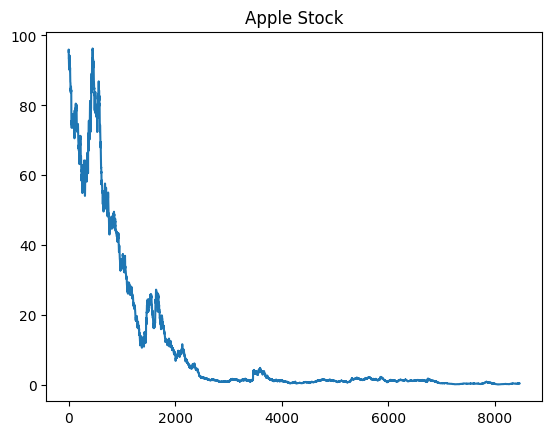

In [7]:
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

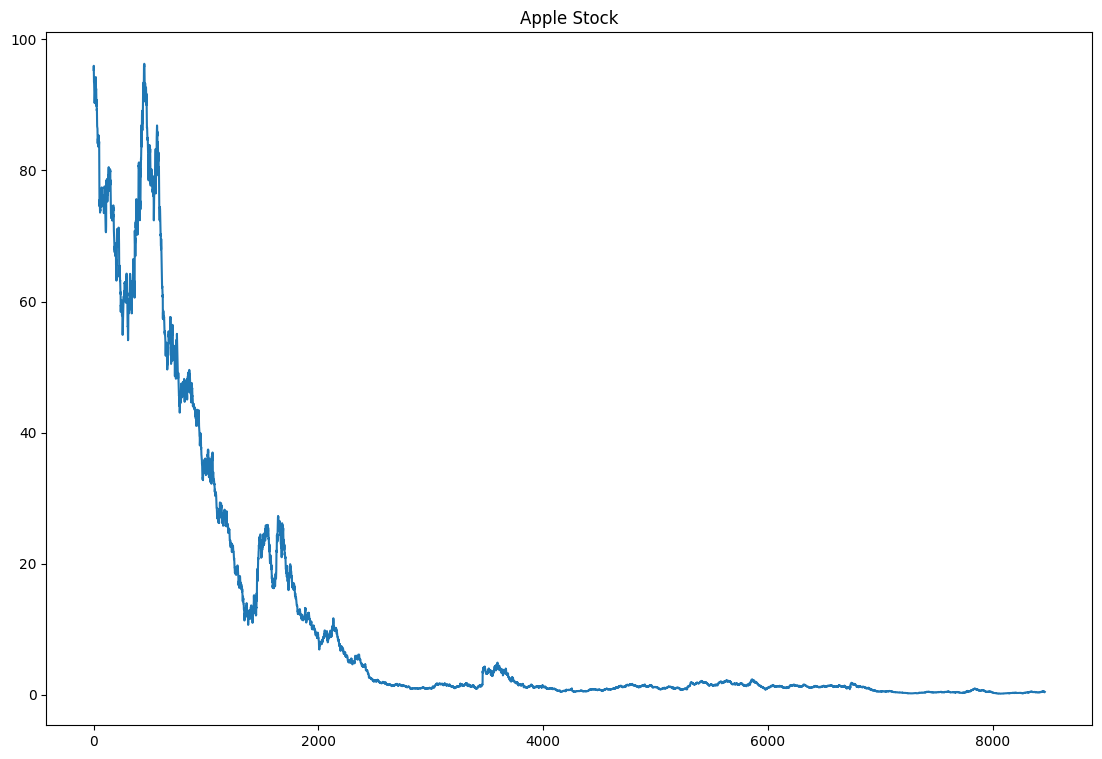

In [23]:
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)
fig

BONUS: Create your own question and answer it.

In [25]:
#I was curious to know how many values are between 0 and 1 in adjacent close.
apple_filtered = apple[(apple['Adj Close']<1) & (apple['Adj Close']>0)].count()
apple_filtered

Date         2420
Open         2420
High         2420
Low          2420
Close        2420
Volume       2420
Adj Close    2420
dtype: int64

In [29]:
adjuniq=apple['Adj Close'].unique()
adjuniq

array([95.35, 95.97, 94.03, ...,  0.19,  0.18,  0.17])

In [32]:
# i wanted to seggregate the values into bins
adj_close_intervals = pd.cut(apple['Adj Close'], bins=10)

# print the intervals and their counts
print(adj_close_intervals.value_counts())

(0.0739, 9.781]     6451
(9.781, 19.392]      543
(19.392, 29.003]     375
(67.447, 77.058]     202
(38.614, 48.225]     185
(77.058, 86.669]     175
(48.225, 57.836]     164
(57.836, 67.447]     151
(29.003, 38.614]     142
(86.669, 96.28]       77
Name: Adj Close, dtype: int64
